# Simple orders analysis

In [1]:
#import modules 
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
# import your newly coded order training set
from olist.order import Order
# Change `with_distance_seller_customer` to False if you have not yet completed the optional part of challenge 1
orders = Order().get_training_data(with_distance_seller_customer=True)

## 1 - Inspect features

Analysing orders features x reviews

In [6]:
orders.describe()

,wait_time,expected_wait_time,delay_vs_expected,dim_is_five_star,dim_is_one_star,review_score,number_of_products,number_of_sellers,price,freight_value,distance_seller_customer
count,96525.000000,96525.000000,96525.000000,96525.000000,96525.000000,96525.000000,96525.000000,96525.000000,96525.000000,96525.000000,96525.000000
mean,12.555259,23.744247,0.772981,0.588977,0.100596,4.142005,1.142699,1.013965,136.935472,22.773011,601.058677
std,9.540464,8.769554,4.748411,0.492022,0.300794,1.296748,0.540518,0.123792,208.935017,21.553810,595.216682
min,0.533414,2.008009,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.850000,0.000000,0.000000
25%,6.764236,18.330069,0.000000,0.000000,0.000000,4.000000,1.000000,1.000000,45.900000,13.830000,187.358391
50%,10.215972,23.232187,0.000000,1.000000,0.000000,5.000000,1.000000,1.000000,86.000000,17.160000,434.070859
75%,15.719502,28.417963,0.000000,1.000000,0.000000,5.000000,1.000000,1.000000,149.900000,24.000000,797.860262
max,209.628611,155.135463,188.975081,1.000000,1.000000,5.000000,21.000000,5.000000,13440.000000,1794.960000,8736.947618


In [7]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96525 entries, 0 to 96532
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96525 non-null  object        
 1   order_delivered_customer_date  96525 non-null  datetime64[ns]
 2   wait_time                      96525 non-null  float64       
 3   expected_wait_time             96525 non-null  float64       
 4   delay_vs_expected              96525 non-null  float64       
 5   order_status                   96525 non-null  object        
 6   dim_is_five_star               96525 non-null  int64         
 7   dim_is_one_star                96525 non-null  int64         
 8   review_score                   96525 non-null  int64         
 9   number_of_products             96525 non-null  int64         
 10  number_of_sellers              96525 non-null  int64         
 11  price          

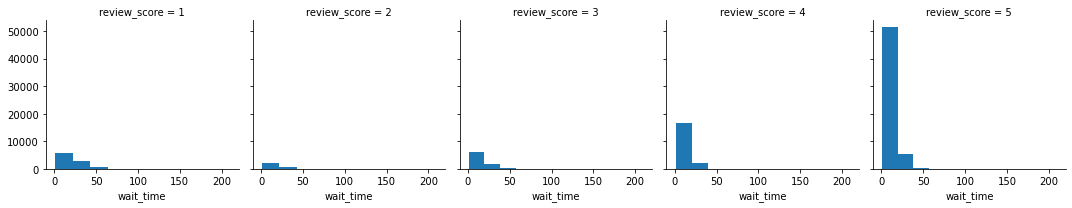

In [8]:
g = sns.FacetGrid(data=orders, col="review_score")
g.map(plt.hist, "wait_time")

<AxesSubplot:xlabel='price', ylabel='Density'>

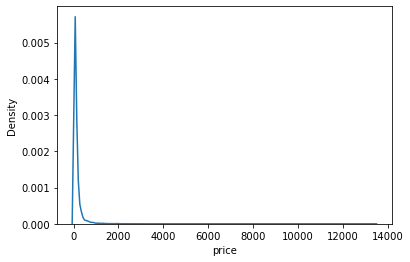

In [9]:
sns.kdeplot(orders['price'])

<AxesSubplot:xlabel='freight_value', ylabel='Density'>

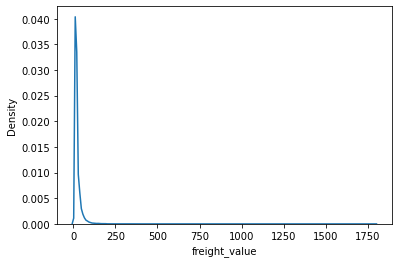

In [10]:
sns.kdeplot(orders['freight_value'])

<AxesSubplot:xlabel='distance_seller_customer', ylabel='Density'>

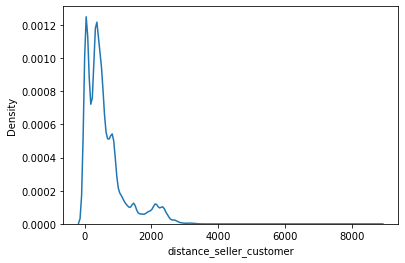

In [11]:
sns.kdeplot(orders['distance_seller_customer'])

In [12]:
orders.corr()

,wait_time,expected_wait_time,delay_vs_expected,dim_is_five_star,dim_is_one_star,review_score,number_of_products,number_of_sellers,price,freight_value,distance_seller_customer
wait_time,1.000000,0.383501,0.707329,-0.235280,0.306392,-0.335082,-0.019244,-0.040724,0.055897,0.167041,0.393250
expected_wait_time,0.383501,1.000000,0.005993,-0.050203,0.034950,-0.052296,0.016287,0.024778,0.076189,0.239051,0.513757
delay_vs_expected,0.707329,0.005993,1.000000,-0.157359,0.283186,-0.271966,-0.013241,-0.017177,0.017079,0.024286,0.066492
dim_is_five_star,-0.235280,-0.050203,-0.157359,1.000000,-0.400339,0.792041,-0.073181,-0.070579,-0.013813,-0.059535,-0.056552
dim_is_one_star,0.306392,0.034950,0.283186,-0.400339,1.000000,-0.810337,0.120458,0.101664,0.046013,0.084189,0.043521
review_score,-0.335082,-0.052296,-0.271966,0.792041,-0.810337,1.000000,-0.124262,-0.116390,-0.035811,-0.091034,-0.059232
number_of_products,-0.019244,0.016287,-0.013241,-0.073181,0.120458,-0.124262,1.000000,0.286230,0.153992,0.439729,-0.016683
number_of_sellers,-0.040724,0.024778,-0.017177,-0.070579,0.101664,-0.116390,0.286230,1.000000,0.042385,0.133497,-0.007524
price,0.055897,0.076189,0.017079,-0.013813,0.046013,-0.035811,0.153992,0.042385,1.000000,0.411600,0.079705
freight_value,0.167041,0.239051,0.024286,-0.059535,0.084189,-0.091034,0.439729,0.133497,0.411600,1.000000,0.313953


<AxesSubplot:>

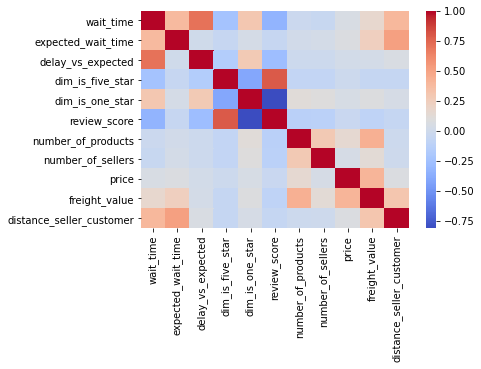

In [13]:
# Correlation plot
sns.heatmap(orders.corr(), cmap='coolwarm')

## 2 - Simple regression of reviews against delivery duration

It seems that `review_score` is mostly correlated with `wait_time` (r = 33%) and `delay_vs_expected` (r=27%).
Let's investigate:

/Users/daniellefroes/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/daniellefroes/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(0.0, 5.919873460058374)

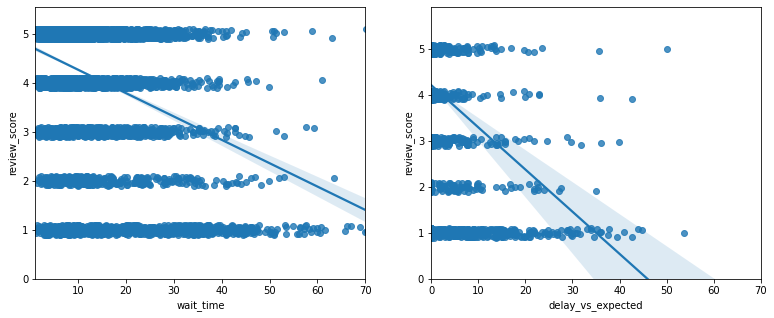

In [14]:
plt.figure(figsize = (13, 5))
plt.subplot(1, 2, 1)
sns.regplot('wait_time', 'review_score', data=orders.sample(10000, random_state=40), y_jitter=.1)
plt.xlim(right=70)
plt.ylim(bottom=0)

plt.subplot(1, 2, 2)
sns.regplot('delay_vs_expected', 'review_score', data=orders.sample(10000, random_state=40), y_jitter=.1)
plt.xlim(right=70)
plt.ylim(bottom=0)

### 2.2 Visual Interpretation

'Computing' the `slope` of each curve visually, I interpreted these coefficients as:

- wait_time - the average score is reduced by 0.05 for each additional day of wait
- delay - the average score is reduced by 0.1 for each additional day above expected

### 2.3 Inferential analysis

Are the coefficients **statistically significant**? i.e that they do not capture random fluctuations due to the limited observation period, and would not generalize well to future orders (all else being equal)?

Estimate the **confidence interval** around the mean value for these slopes  
$$slope_{wait} = -0.05 ± \ ?? \ \text{[95% interval]} $$
$$slope_{delay} = -0.1 ± \ ?? \ \text{[95% interval]} $$

Use seaborn to compute 95% confidence interval with a shaded blue cone around the regression line. Check how the slope change when the sample size is smaller. Also change the size of the confidence interval by playing with regplot `ci` parameter (95% by default).

Text(0.5, 1.0, 'Full dataset (100000 datapoints), Confidence Interval 99%')

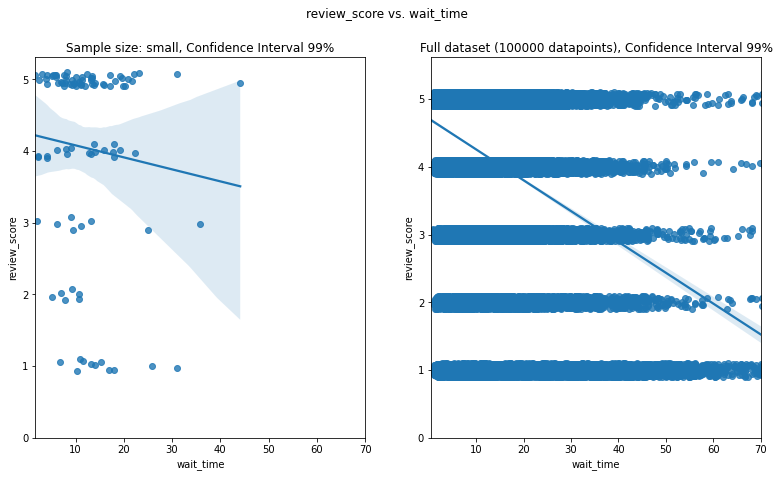

In [16]:
sample = orders.sample(100, random_state=42)
plt.figure(figsize=(13,7))
plt.suptitle('review_score vs. wait_time')

plt.subplot(1,2,1)
sns.regplot(x = sample.wait_time, y= sample.review_score, y_jitter=.1, ci=99)
plt.xlim(right=70)
plt.ylim(bottom=0)
plt.title("Sample size: small, Confidence Interval 99%")

plt.subplot(1,2,2)
sns.regplot(x = orders.wait_time, y= orders.review_score, y_jitter=.1, ci=99)
plt.xlim(right=70)
plt.ylim(bottom=0)
plt.title("Full dataset (100000 datapoints), Confidence Interval 99%")

Interpretation

When plotting all datapoints:
- The 95% confidence interval for the slope does not contain the value 0.
- 95% confident that slower deliveries are associated with weaker reviews.
- The `p-value` associated with the null-hypothesis "review_score is not related to delivery duration" is close to 0, and we can safely reject this hypothesis

$\implies$ Our findings are said to be **statistically significant**. 

However, **correlation does not imply causality**. It may well be that some products, which happen to be inherently slow to deliver on average (heavy ones maybe?) also happen to have a consistently low review_score, however long they take to be delivered. Identifying these **confounding factor** is crucial and cannot be done with simple univariate regression. Next step is analysing this using multivariate linear regression.